In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils.np_utils import to_categorical
from tensorflow.keras.utils import plot_model
from keras import regularizers
from sklearn.metrics import roc_curve, auc
from keras.layers import Activation
from keras import backend as K

In [2]:
# load saved df
df = pd.read_pickle('test.pkl')
print (df.keys())

Index([      b'pt_of_muon',      b'eta_of_muon',      b'phi_of_muon',
         b'energy_of_muon',        b'hcal_ieta',        b'hcal_iphi',
           b'IsolationR04',     b'IsolationR03',      b'ecal_3into3',
            b'hcal_3into3',         b'ecal_3x3',         b'hcal_1x1',
       'b'hcal_edepth1'_x', 'b'hcal_edepth2'_x', 'b'hcal_edepth3'_x',
       'b'hcal_edepth4'_x', 'b'hcal_edepth5'_x', 'b'hcal_edepth6'_x',
       'b'hcal_edepth7'_x', 'b'hcal_edepth1'_y', 'b'hcal_edepth2'_y',
       'b'hcal_edepth3'_y', 'b'hcal_edepth4'_y', 'b'hcal_edepth5'_y',
       'b'hcal_edepth6'_y', 'b'hcal_edepth7'_y'],
      dtype='object')


In [3]:
# filter events
ieta=27
df = df.loc[abs(df[b'hcal_ieta']) == ieta]

df = df.loc[df["b'hcal_edepth1'_x"] > 0.00001]
df = df.loc[df["b'hcal_edepth1'_y"] > 0.00001]

df = df.loc[df["b'hcal_edepth2'_x"] > 0.00001]
df = df.loc[df["b'hcal_edepth2'_y"] > 0.00001]

df = df.loc[df["b'hcal_edepth3'_x"] > 0.00001]
df = df.loc[df["b'hcal_edepth3'_y"] > 0.00001]

df = df.loc[df["b'hcal_edepth4'_x"] > 0.00001]
df = df.loc[df["b'hcal_edepth4'_y"] > 0.00001]

df = df.loc[df["b'hcal_edepth5'_x"] > 0.00001]
df = df.loc[df["b'hcal_edepth5'_y"] > 0.00001]

df = df.loc[df["b'hcal_edepth6'_x"] > 0.00001]
df = df.loc[df["b'hcal_edepth6'_y"] > 0.00001]

if ieta in range (26,28):
    df = df.loc[df["b'hcal_edepth7'_x"] > 0.00001]
    df = df.loc[df["b'hcal_edepth7'_y"] > 0.00001]

In [4]:
df["b'hcal_edepth1'_x"]=np.log(10000*df["b'hcal_edepth1'_x"])
df["b'hcal_edepth1'_y"]=np.log(10000*df["b'hcal_edepth1'_y"])

df["b'hcal_edepth2'_x"]=np.log(10000*df["b'hcal_edepth2'_x"])
df["b'hcal_edepth2'_y"]=np.log(10000*df["b'hcal_edepth2'_y"])

df["b'hcal_edepth3'_x"]=np.log(10000*df["b'hcal_edepth3'_x"])
df["b'hcal_edepth3'_y"]=np.log(10000*df["b'hcal_edepth3'_y"])

df["b'hcal_edepth4'_x"]=np.log(10000*df["b'hcal_edepth4'_x"])
df["b'hcal_edepth4'_y"]=np.log(10000*df["b'hcal_edepth4'_y"])

df["b'hcal_edepth5'_x"]=np.log(10000*df["b'hcal_edepth5'_x"])
df["b'hcal_edepth5'_y"]=np.log(10000*df["b'hcal_edepth5'_y"])

df["b'hcal_edepth6'_x"]=np.log(10000*df["b'hcal_edepth6'_x"])
df["b'hcal_edepth6'_y"]=np.log(10000*df["b'hcal_edepth6'_y"])

if ieta in range (26,28):
    df["b'hcal_edepth7'_x"]=np.log(10000*df["b'hcal_edepth7'_x"])
    df["b'hcal_edepth7'_y"]=np.log(10000*df["b'hcal_edepth7'_y"])

In [5]:
# keep originals before scaling
df['hcal_edepth1_un'] = df["b'hcal_edepth1'_x"]
df['hcal_edepth2_un'] = df["b'hcal_edepth2'_x"]
df['hcal_edepth3_un'] = df["b'hcal_edepth3'_x"]
df['hcal_edepth4_un'] = df["b'hcal_edepth4'_x"]
df['hcal_edepth5_un'] = df["b'hcal_edepth5'_x"]
df['hcal_edepth6_un'] = df["b'hcal_edepth6'_x"]
df['hcal_edepth7_un'] = df["b'hcal_edepth7'_x"]

df['hcal_ieta_un'] = df[b'hcal_ieta']

In [6]:
# scaling input vars
cols_to_minmax =[b'pt_of_muon',b'eta_of_muon',b'phi_of_muon',b'energy_of_muon',b'hcal_ieta',
                b'hcal_iphi',     b'IsolationR04',     b'IsolationR03',
                b'ecal_3into3',      b'hcal_3into3', 
                b'ecal_3x3',         b'hcal_1x1',
               "b'hcal_edepth1'_x", "b'hcal_edepth2'_x", "b'hcal_edepth3'_x",
               "b'hcal_edepth4'_x", "b'hcal_edepth5'_x", "b'hcal_edepth6'_x",
               "b'hcal_edepth7'_x"]


df[cols_to_minmax] = df[cols_to_minmax].apply(lambda x: (x - x.min()) /  (x.max() - x.min()))

b'pt_of_muon'


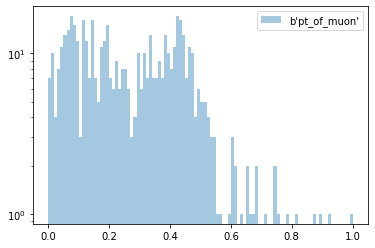

b'eta_of_muon'


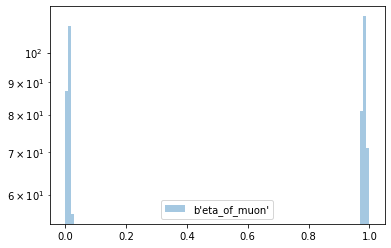

b'phi_of_muon'


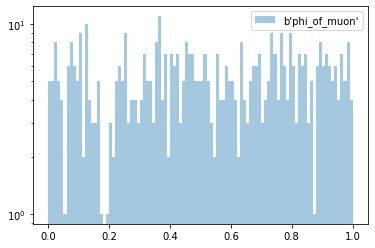

b'energy_of_muon'


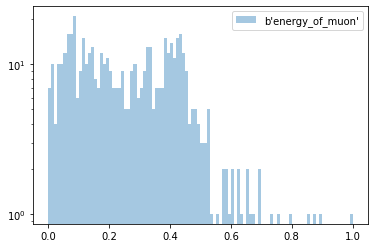

b'hcal_ieta'


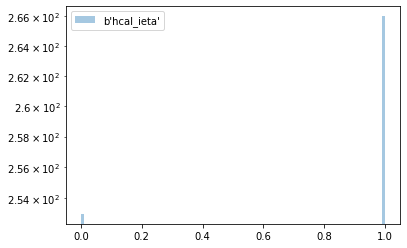

b'hcal_iphi'


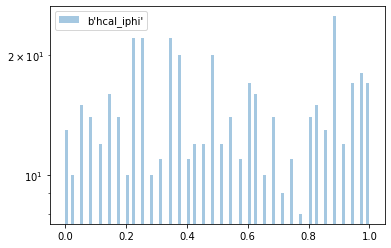

b'IsolationR04'


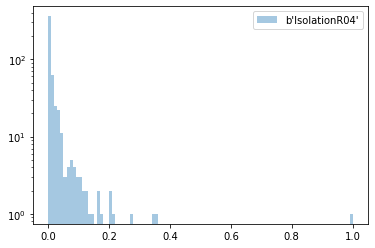

b'IsolationR03'


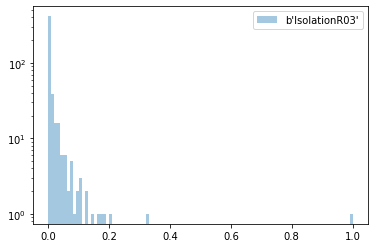

b'ecal_3into3'


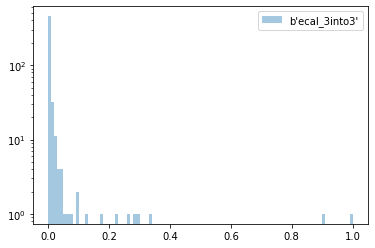

b'hcal_3into3'


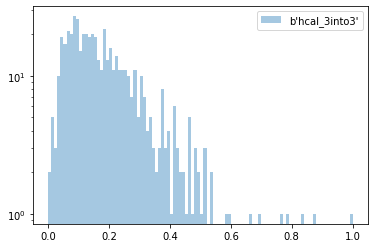

b'ecal_3x3'


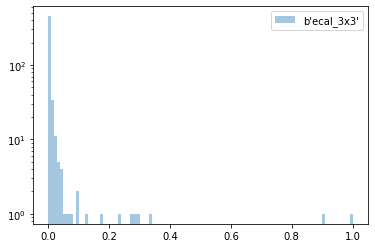

b'hcal_1x1'


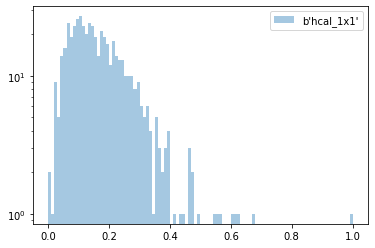

b'hcal_edepth1'_x


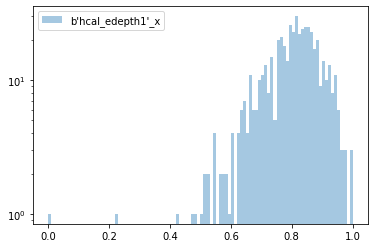

b'hcal_edepth2'_x


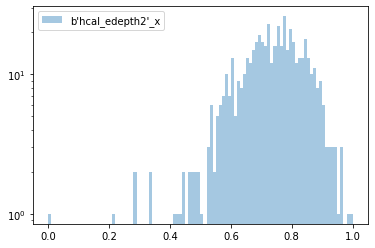

b'hcal_edepth3'_x


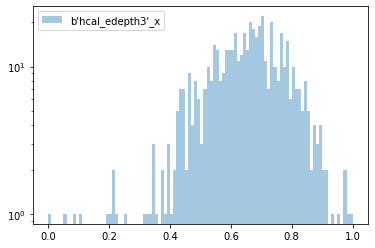

b'hcal_edepth4'_x


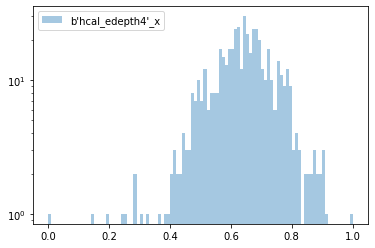

b'hcal_edepth5'_x


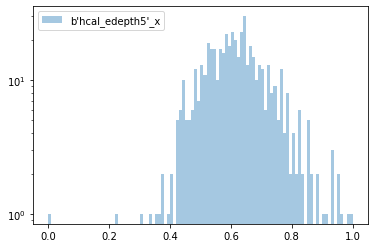

b'hcal_edepth6'_x


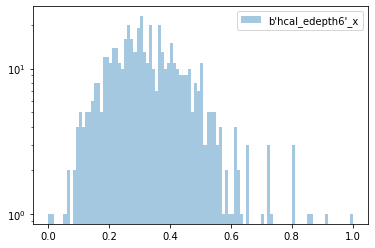

b'hcal_edepth7'_x


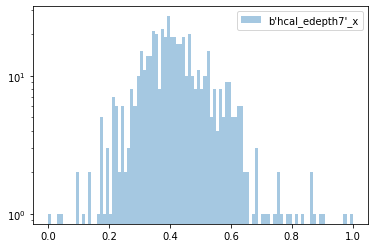

b'hcal_edepth1'_y


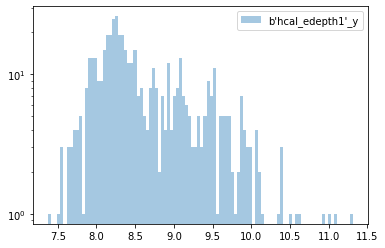

b'hcal_edepth2'_y


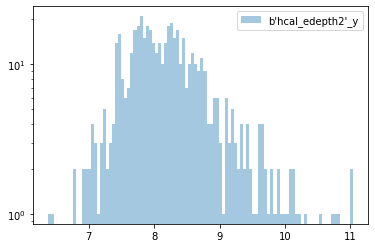

b'hcal_edepth3'_y


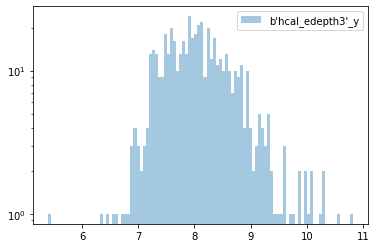

b'hcal_edepth4'_y


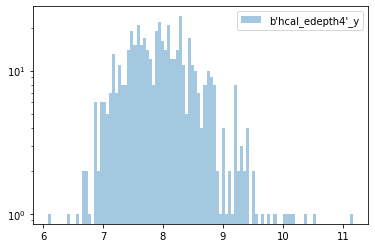

b'hcal_edepth5'_y


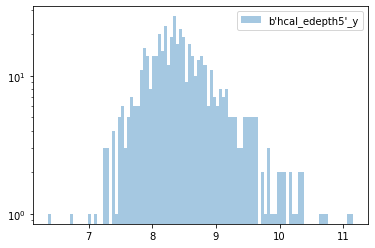

b'hcal_edepth6'_y


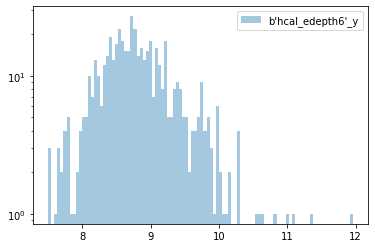

b'hcal_edepth7'_y


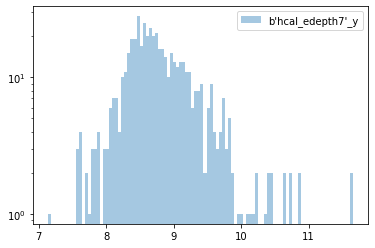

hcal_edepth1_un


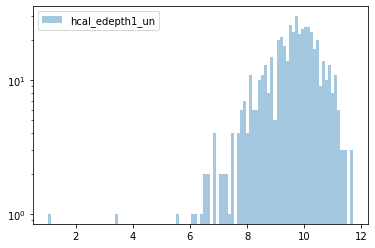

hcal_edepth2_un


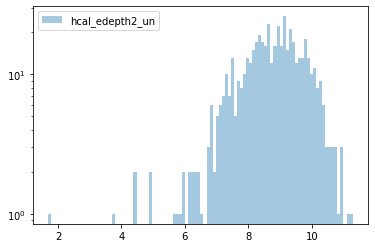

hcal_edepth3_un


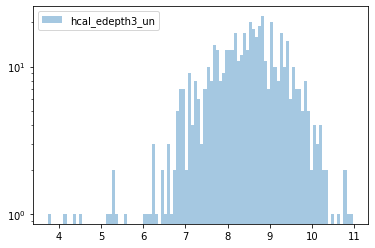

hcal_edepth4_un


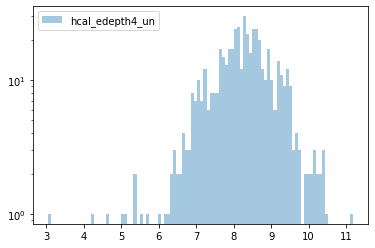

hcal_edepth5_un


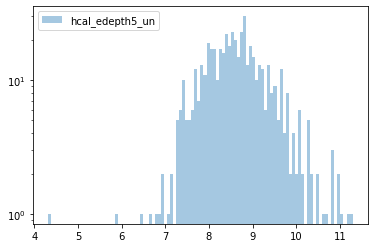

hcal_edepth6_un


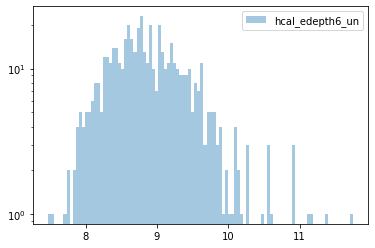

hcal_edepth7_un


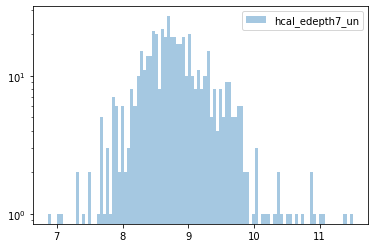

hcal_ieta_un


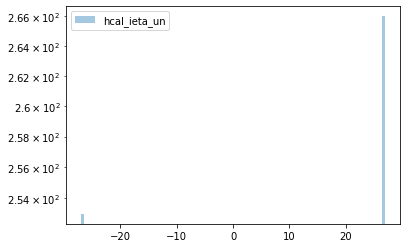

In [7]:
for i in (df.keys()):
    print (i)
    if ieta not in range (26,28):
        if i == "b'hcal_edepth7'_x":
            continue
        if i == "b'hcal_edepth7'_y":
            continue
        if i == "b'hcal_edepth7'_un":
            continue
    plt.hist(df[i],bins=100,label=str(i),alpha=0.4)
    plt.yscale("log")
    plt.legend()
    plt.show()

In [9]:
#print(df.keys)
data = df.values
print (data.shape[0])
ntest = 500
testindx = data.shape[0] - ntest
X_train_depth1 = data[:testindx,np.r_[0:12,12]]   
X_train_depth2 = data[:testindx,np.r_[0:12,13]] 
X_train_depth3 = data[:testindx,np.r_[0:12,14]] 
X_train_depth4 = data[:testindx,np.r_[0:12,15]] 
X_train_depth5 = data[:testindx,np.r_[0:12,16]] 
X_train_depth6 = data[:testindx,np.r_[0:12,17]] 
X_train_depth7 = data[:testindx,np.r_[0:12,18]]

Y_train_depth1 = data[:testindx,19]
Y_train_depth2 = data[:testindx,20]
Y_train_depth3 = data[:testindx,21]
Y_train_depth4 = data[:testindx,22]
Y_train_depth5 = data[:testindx,23]
Y_train_depth6 = data[:testindx,24]
Y_train_depth7 = data[:testindx,25]

X_test = data[testindx:,:]
#print(X_test)
print (X_test.shape) 
print ("shape of X_train_depth1:",X_train_depth1.shape)
#print ("shape of X_train_depth2:",X_train_depth2.shape)
print ("shape of Y_train_depth2:",Y_train_depth1.shape)


519
(500, 34)
shape of X_train_depth1: (19, 13)
shape of Y_train_depth2: (19,)


true_hist_depth1[0] =  [6 6 6 1]
sum weight_depth1: 99.99999999999999
true_hist_depth1 [6 6 6 1]
weight_vals_depth1: [14.28571429 85.71428571]


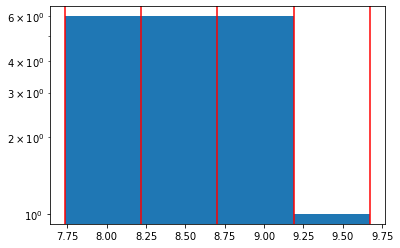

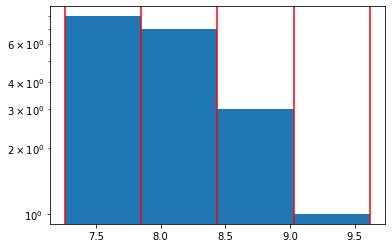

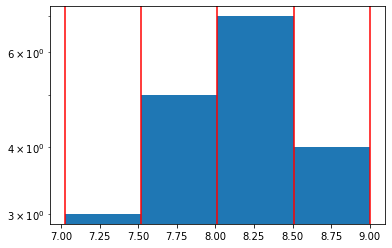

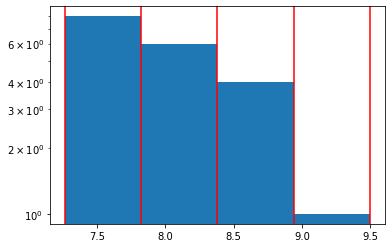

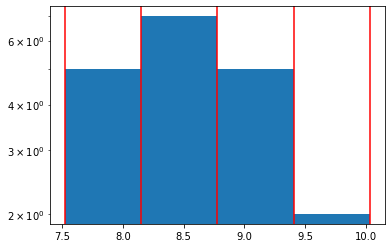

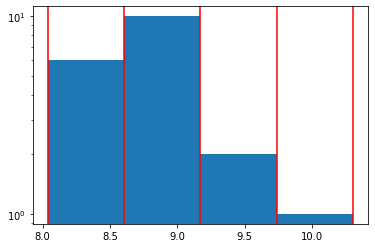

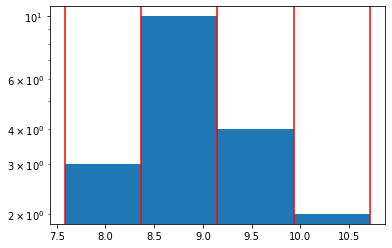

In [10]:
# sample weights
histoAR_depth1 = Y_train_depth1.copy()
histoAR_depth2 = Y_train_depth2.copy()
histoAR_depth3 = Y_train_depth3.copy()
histoAR_depth4 = Y_train_depth4.copy()
histoAR_depth5 = Y_train_depth5.copy()
histoAR_depth6 = Y_train_depth6.copy()
histoAR_depth7 = Y_train_depth7.copy()

nbins = 4 ### works best[4 with no sqrt / 500 with sqrt normed] / 1000 with norm*100 / 4000 ok no sqrt

true_hist_depth1 = np.histogram(histoAR_depth1,bins = nbins,
                                range=(np.min(Y_train_depth1)-0.001,np.max(Y_train_depth1)+0.001))
true_hist_depth2 = np.histogram(histoAR_depth2,bins = nbins,
                                range=(np.min(Y_train_depth2)-0.001,np.max(Y_train_depth2)+0.001))
true_hist_depth3 = np.histogram(histoAR_depth3,bins = nbins,
                                range=(np.min(Y_train_depth3)-0.001,np.max(Y_train_depth3)+0.001))
true_hist_depth4 = np.histogram(histoAR_depth4,bins = nbins,
                                range=(np.min(Y_train_depth4)-0.001,np.max(Y_train_depth4)+0.001))
true_hist_depth5 = np.histogram(histoAR_depth5,bins = nbins,
                                range=(np.min(Y_train_depth5)-0.001,np.max(Y_train_depth5)+0.001))
true_hist_depth6 = np.histogram(histoAR_depth6,bins = nbins,
                                range=(np.min(Y_train_depth6)-0.001,np.max(Y_train_depth6)+0.001))
true_hist_depth7 = np.histogram(histoAR_depth7,bins = nbins,
                                range=(np.min(Y_train_depth7)-0.001,np.max(Y_train_depth7)+0.001))


binweight_depth1 = true_hist_depth1[0][np.digitize(histoAR_depth1,true_hist_depth1[1]) - 1]
binweight_depth2 = true_hist_depth2[0][np.digitize(histoAR_depth2,true_hist_depth2[1]) - 1]
binweight_depth3 = true_hist_depth3[0][np.digitize(histoAR_depth3,true_hist_depth3[1]) - 1]
binweight_depth4 = true_hist_depth4[0][np.digitize(histoAR_depth4,true_hist_depth4[1]) - 1]
binweight_depth5 = true_hist_depth5[0][np.digitize(histoAR_depth5,true_hist_depth5[1]) - 1]
binweight_depth6 = true_hist_depth6[0][np.digitize(histoAR_depth6,true_hist_depth6[1]) - 1]
binweight_depth7 = true_hist_depth7[0][np.digitize(histoAR_depth7,true_hist_depth7[1]) - 1]


print ("true_hist_depth1[0] = ", true_hist_depth1[0])

binweight_depth1 = 1/binweight_depth1
binweight_depth2 = 1/binweight_depth2
binweight_depth3 = 1/binweight_depth3
binweight_depth4 = 1/binweight_depth4
binweight_depth5 = 1/binweight_depth5
binweight_depth6 = 1/binweight_depth6
binweight_depth7 = 1/binweight_depth7

binweight_depth1 = 100*binweight_depth1/np.sum(np.unique(binweight_depth1)) ## 5000/5 ok
binweight_depth2 = 100*binweight_depth2/np.sum(np.unique(binweight_depth2))
binweight_depth3 = 100*binweight_depth3/np.sum(np.unique(binweight_depth3))
binweight_depth4 = 100*binweight_depth4/np.sum(np.unique(binweight_depth4))
binweight_depth5 = 100*binweight_depth5/np.sum(np.unique(binweight_depth5))
binweight_depth6 = 100*binweight_depth6/np.sum(np.unique(binweight_depth6))
binweight_depth7 = 100*binweight_depth7/np.sum(np.unique(binweight_depth7))


print("sum weight_depth1:",np.sum(np.unique(binweight_depth1)))
print("true_hist_depth1",true_hist_depth1[0])
#print("binweight_depth1",binweight_depth1)
print("weight_vals_depth1:",np.unique(binweight_depth1))

if ieta in range (26,28):
    binweight=[binweight_depth1, binweight_depth2, binweight_depth3, binweight_depth4, binweight_depth5,
               binweight_depth6, binweight_depth7]
    
    histoAR = [histoAR_depth1, histoAR_depth2, histoAR_depth3, histoAR_depth4, histoAR_depth5,
               histoAR_depth6, histoAR_depth7]
    
    true_hist = [true_hist_depth1[1], true_hist_depth2[1], true_hist_depth3[1], true_hist_depth4[1], 
                 true_hist_depth5[1], true_hist_depth6[1], true_hist_depth7[1]]
    
    for i in range (0,7):
        plt.hist(histoAR[i],bins=nbins)
        
        for j in true_hist[i]:
            plt.axvline(j,color='r')
        
        plt.yscale("log")
        plt.show()
else:
    binweight=[binweight_depth1, binweight_depth2, binweight_depth3, binweight_depth4, binweight_depth5,
               binweight_depth6]
    
    histoAR = [histoAR_depth1, histoAR_depth2, histoAR_depth3, histoAR_depth4, histoAR_depth5, 
               histoAR_depth6]

    true_hist = [true_hist_depth1[1], true_hist_depth2[1], true_hist_depth3[1], true_hist_depth4[1], 
                 true_hist_depth5[1], true_hist_depth6[1]]


    for i in range (0,6):
        plt.hist(histoAR[i],bins=nbins)

        for j in true_hist[i]:
            plt.axvline(j,color='r')
        plt.yscale("log")
        plt.show()

In [11]:
import keras.backend as kb
def custom_loss_depth(preds, targets):
    return (kb.square(preds-targets))


In [12]:
PYTHONHASHSEED=0
from numpy.random import seed
seed(1)
import tensorflow as tf
tf.random.set_seed(2)
from keras.layers import concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

print ("creating model=========>")

input1=Input(shape=(X_train_depth1.shape[1],))
input2=Input(shape=(X_train_depth2.shape[1],))
input3=Input(shape=(X_train_depth3.shape[1],))
input4=Input(shape=(X_train_depth4.shape[1],))
input5=Input(shape=(X_train_depth5.shape[1],))
input6=Input(shape=(X_train_depth6.shape[1],))
if ieta in range (26,28):
    input7=Input(shape=(X_train_depth7.shape[1],))

x1 = Dense(16, activation="relu")(input1)
x1 = Dense(8, activation="relu")(x1)
x1 = Dense(4, activation="relu")(x1)
x1 = Model(inputs=input1, outputs=x1)
x2 = Dense(32, activation="relu")(input2)
x2 = Dense(16, activation="relu")(x2)
x2 = Dense(4, activation="relu")(x2)
x2 = Model(inputs=input2, outputs=x2)
x3 = Dense(32, activation="relu")(input3)
x3 = Dense(16, activation="relu")(x3)
x3 = Dense(4, activation="relu")(x3)
x3 = Model(inputs=input3, outputs=x3)
x4 = Dense(32, activation="relu")(input4)
x4 = Dense(16, activation="relu")(x4)
x4 = Dense(4, activation="relu")(x4)
x4 = Model(inputs=input4, outputs=x4)
x5 = Dense(64, activation="relu")(input5)
x5 = Dense(16, activation="relu")(x5)
x5 = Dense(4, activation="relu")(x5)
x5 = Model(inputs=input5, outputs=x5)
x6 = Dense(32, activation="relu")(input6)
x6 = Dense(16, activation="relu")(x6)
x6 = Dense(4, activation="relu")(x6)
x6 = Model(inputs=input6, outputs=x6)
if ieta in range (26,28):
    x7 = Dense(32, activation="relu")(input7)
    x7 = Dense(16, activation="relu")(x7)
    x7 = Dense(4, activation="relu")(x7)
    x7 = Model(inputs=input7, outputs=x7)

if ieta in range (26,28):
    n=7
    combined = tf.keras.layers.Concatenate()([x1.output, x2.output, x3.output, x4.output, 
                                              x5.output, x6.output, x7.output])
else:
    n=6
    combined = tf.keras.layers.Concatenate()([x1.output, x2.output, x3.output, x4.output, x5.output, x6.output])

z1 = Dense(64, activation="relu")(combined)
z1 = Dense(16, activation="relu")(z1)
z1 = Dense(n, activation="relu")(z1)


if ieta in range (26,28):
    model = Model(inputs=[x1.input, x2.input, x3.input, x4.input, x5.input, x6.input, x7.input], 
                  outputs=z1)

    model.compile(loss=custom_loss_depth,optimizer='adam')
    model.summary()
    print ("fitting now=========>")
    history = model.fit([X_train_depth1, X_train_depth2, X_train_depth3, X_train_depth4, X_train_depth5, 
                         X_train_depth6, X_train_depth7], [Y_train_depth1, Y_train_depth2, Y_train_depth3, 
                         Y_train_depth4, Y_train_depth5, Y_train_depth6, Y_train_depth7], batch_size=4000, 
                         epochs=1500, validation_split=0.2, verbose=1,sample_weight=binweight)
else:
    model = Model(inputs=[x1.input, x2.input, x3.input, x4.input, x5.input, x6.input], 
                  outputs=z1)

    model.compile(loss=custom_loss_depth,optimizer='adam')
    model.summary()
    print ("fitting now=========>")
    history = model.fit([X_train_depth1, X_train_depth2, X_train_depth3, X_train_depth4, X_train_depth5, 
                         X_train_depth6],[Y_train_depth1, Y_train_depth2, Y_train_depth3, Y_train_depth4,
                         Y_train_depth5, Y_train_depth6] , batch_size=4000, epochs=1500, validation_split=0.2, 
                         verbose=1,sample_weight=binweight)

creating model=========>
Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 13)]         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 13)]         0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 13)]         0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 13)]         0                                            
___________________________________________________________________

1/1 [==============================] - 1s 1s/step - loss: 1448.5087 - val_loss: 1030.1350
Epoch 9/1500
1/1 [==============================] - 1s 830ms/step - loss: 1441.6420 - val_loss: 1025.2869
Epoch 10/1500
1/1 [==============================] - 1s 717ms/step - loss: 1434.5178 - val_loss: 1020.3298
Epoch 11/1500
1/1 [==============================] - 0s 44ms/step - loss: 1427.2794 - val_loss: 1015.2171
Epoch 12/1500
1/1 [==============================] - 0s 34ms/step - loss: 1419.9192 - val_loss: 1009.9798
Epoch 13/1500
1/1 [==============================] - 0s 35ms/step - loss: 1412.4065 - val_loss: 1004.5845
Epoch 14/1500
1/1 [==============================] - 0s 36ms/step - loss: 1404.5332 - val_loss: 998.9308
Epoch 15/1500
1/1 [==============================] - 0s 33ms/step - loss: 1396.5201 - val_loss: 993.1786
Epoch 16/1500
1/1 [==============================] - 0s 35ms/step - loss: 1388.2316 - val_loss: 987.1591
Epoch 17/1500
1/1 [==============================] - 0s 34ms/ste

1/1 [==============================] - 0s 34ms/step - loss: 451.4899 - val_loss: 338.3318
Epoch 87/1500
1/1 [==============================] - 0s 35ms/step - loss: 450.5024 - val_loss: 337.4183
Epoch 88/1500
1/1 [==============================] - 0s 34ms/step - loss: 449.4378 - val_loss: 336.4449
Epoch 89/1500
1/1 [==============================] - 0s 34ms/step - loss: 448.3153 - val_loss: 335.4349
Epoch 90/1500
1/1 [==============================] - 0s 34ms/step - loss: 447.1629 - val_loss: 334.4052
Epoch 91/1500
1/1 [==============================] - 0s 33ms/step - loss: 446.0103 - val_loss: 333.3853
Epoch 92/1500
1/1 [==============================] - 0s 35ms/step - loss: 444.8847 - val_loss: 332.3944
Epoch 93/1500
1/1 [==============================] - 0s 37ms/step - loss: 443.8297 - val_loss: 331.4422
Epoch 94/1500
1/1 [==============================] - 0s 32ms/step - loss: 442.8622 - val_loss: 330.5442
Epoch 95/1500
1/1 [==============================] - 0s 32ms/step - loss: 441.

1/1 [==============================] - 0s 33ms/step - loss: 428.4674 - val_loss: 314.7114
Epoch 165/1500
1/1 [==============================] - 0s 33ms/step - loss: 428.4304 - val_loss: 314.6657
Epoch 166/1500
1/1 [==============================] - 0s 33ms/step - loss: 428.3939 - val_loss: 314.6218
Epoch 167/1500
1/1 [==============================] - 0s 33ms/step - loss: 428.3580 - val_loss: 314.5793
Epoch 168/1500
1/1 [==============================] - 0s 33ms/step - loss: 428.3226 - val_loss: 314.5378
Epoch 169/1500
1/1 [==============================] - 0s 33ms/step - loss: 428.2885 - val_loss: 314.4976
Epoch 170/1500
1/1 [==============================] - 0s 33ms/step - loss: 428.2553 - val_loss: 314.4585
Epoch 171/1500
1/1 [==============================] - 0s 33ms/step - loss: 428.2224 - val_loss: 314.4202
Epoch 172/1500
1/1 [==============================] - 0s 33ms/step - loss: 428.1899 - val_loss: 314.3827
Epoch 173/1500
1/1 [==============================] - 0s 33ms/step - l

1/1 [==============================] - 0s 32ms/step - loss: 426.8762 - val_loss: 312.1349
Epoch 243/1500
1/1 [==============================] - 0s 32ms/step - loss: 426.8641 - val_loss: 312.1052
Epoch 244/1500
1/1 [==============================] - 0s 33ms/step - loss: 426.8530 - val_loss: 312.0739
Epoch 245/1500
1/1 [==============================] - 0s 34ms/step - loss: 426.8417 - val_loss: 312.0411
Epoch 246/1500
1/1 [==============================] - 0s 33ms/step - loss: 426.8302 - val_loss: 312.0071
Epoch 247/1500
1/1 [==============================] - 0s 36ms/step - loss: 426.8185 - val_loss: 311.9724
Epoch 248/1500
1/1 [==============================] - 0s 35ms/step - loss: 426.8078 - val_loss: 311.9378
Epoch 249/1500
1/1 [==============================] - 0s 34ms/step - loss: 426.7970 - val_loss: 311.9048
Epoch 250/1500
1/1 [==============================] - 0s 33ms/step - loss: 426.7857 - val_loss: 311.8750
Epoch 251/1500
1/1 [==============================] - 0s 35ms/step - l

1/1 [==============================] - 0s 32ms/step - loss: 426.1634 - val_loss: 310.2017
Epoch 321/1500
1/1 [==============================] - 0s 33ms/step - loss: 426.1560 - val_loss: 310.1815
Epoch 322/1500
1/1 [==============================] - 0s 33ms/step - loss: 426.1490 - val_loss: 310.1632
Epoch 323/1500
1/1 [==============================] - 0s 32ms/step - loss: 426.1415 - val_loss: 310.1468
Epoch 324/1500
1/1 [==============================] - 0s 33ms/step - loss: 426.1346 - val_loss: 310.1297
Epoch 325/1500
1/1 [==============================] - 0s 33ms/step - loss: 426.1271 - val_loss: 310.1120
Epoch 326/1500
1/1 [==============================] - 0s 32ms/step - loss: 426.1198 - val_loss: 310.0947
Epoch 327/1500
1/1 [==============================] - 0s 33ms/step - loss: 426.1132 - val_loss: 310.0813
Epoch 328/1500
1/1 [==============================] - 0s 33ms/step - loss: 426.1057 - val_loss: 310.0676
Epoch 329/1500
1/1 [==============================] - 0s 33ms/step - l

1/1 [==============================] - 0s 33ms/step - loss: 425.6024 - val_loss: 309.0678
Epoch 399/1500
1/1 [==============================] - 0s 33ms/step - loss: 425.5960 - val_loss: 309.0568
Epoch 400/1500
1/1 [==============================] - 0s 33ms/step - loss: 425.5897 - val_loss: 309.0463
Epoch 401/1500
1/1 [==============================] - 0s 35ms/step - loss: 425.5835 - val_loss: 309.0349
Epoch 402/1500
1/1 [==============================] - 0s 33ms/step - loss: 425.5772 - val_loss: 309.0226
Epoch 403/1500
1/1 [==============================] - 0s 34ms/step - loss: 425.5716 - val_loss: 309.0083
Epoch 404/1500
1/1 [==============================] - 0s 33ms/step - loss: 425.5657 - val_loss: 308.9928
Epoch 405/1500
1/1 [==============================] - 0s 33ms/step - loss: 425.5593 - val_loss: 308.9765
Epoch 406/1500
1/1 [==============================] - 0s 35ms/step - loss: 425.5534 - val_loss: 308.9612
Epoch 407/1500
1/1 [==============================] - 0s 33ms/step - l

Epoch 476/1500
1/1 [==============================] - 0s 31ms/step - loss: 425.2197 - val_loss: 308.3845
Epoch 477/1500
1/1 [==============================] - 0s 32ms/step - loss: 425.2162 - val_loss: 308.3813
Epoch 478/1500
1/1 [==============================] - 0s 32ms/step - loss: 425.2128 - val_loss: 308.3772
Epoch 479/1500
1/1 [==============================] - 0s 31ms/step - loss: 425.2092 - val_loss: 308.3729
Epoch 480/1500
1/1 [==============================] - 0s 32ms/step - loss: 425.2057 - val_loss: 308.3681
Epoch 481/1500
1/1 [==============================] - 0s 31ms/step - loss: 425.2023 - val_loss: 308.3627
Epoch 482/1500
1/1 [==============================] - 0s 32ms/step - loss: 425.1989 - val_loss: 308.3570
Epoch 483/1500
1/1 [==============================] - 0s 32ms/step - loss: 425.1953 - val_loss: 308.3545
Epoch 484/1500
1/1 [==============================] - 0s 32ms/step - loss: 425.1920 - val_loss: 308.3532
Epoch 485/1500
1/1 [==============================] - 0

1/1 [==============================] - 0s 32ms/step - loss: 425.0312 - val_loss: 307.9146
Epoch 555/1500
1/1 [==============================] - 0s 33ms/step - loss: 425.0302 - val_loss: 307.9081
Epoch 556/1500
1/1 [==============================] - 0s 32ms/step - loss: 425.0294 - val_loss: 307.9019
Epoch 557/1500
1/1 [==============================] - 0s 33ms/step - loss: 425.0285 - val_loss: 307.8990
Epoch 558/1500
1/1 [==============================] - 0s 33ms/step - loss: 425.0276 - val_loss: 307.8958
Epoch 559/1500
1/1 [==============================] - 0s 32ms/step - loss: 425.0268 - val_loss: 307.8925
Epoch 560/1500
1/1 [==============================] - 0s 33ms/step - loss: 425.0260 - val_loss: 307.8891
Epoch 561/1500
1/1 [==============================] - 0s 32ms/step - loss: 425.0252 - val_loss: 307.8849
Epoch 562/1500
1/1 [==============================] - 0s 33ms/step - loss: 425.0244 - val_loss: 307.8797
Epoch 563/1500
1/1 [==============================] - 0s 32ms/step - l

1/1 [==============================] - 0s 32ms/step - loss: 424.9957 - val_loss: 307.6503
Epoch 633/1500
1/1 [==============================] - 0s 34ms/step - loss: 424.9955 - val_loss: 307.6494
Epoch 634/1500
1/1 [==============================] - 0s 32ms/step - loss: 424.9953 - val_loss: 307.6480
Epoch 635/1500
1/1 [==============================] - 0s 32ms/step - loss: 424.9951 - val_loss: 307.6468
Epoch 636/1500
1/1 [==============================] - 0s 32ms/step - loss: 424.9949 - val_loss: 307.6457
Epoch 637/1500
1/1 [==============================] - 0s 32ms/step - loss: 424.9947 - val_loss: 307.6453
Epoch 638/1500
1/1 [==============================] - 0s 32ms/step - loss: 424.9946 - val_loss: 307.6455
Epoch 639/1500
1/1 [==============================] - 0s 32ms/step - loss: 424.9944 - val_loss: 307.6458
Epoch 640/1500
1/1 [==============================] - 0s 32ms/step - loss: 424.9942 - val_loss: 307.6455
Epoch 641/1500
1/1 [==============================] - 0s 32ms/step - l

1/1 [==============================] - 0s 32ms/step - loss: 424.9846 - val_loss: 307.5938
Epoch 711/1500
1/1 [==============================] - ETA: 0s - loss: 424.984 - 0s 32ms/step - loss: 424.9845 - val_loss: 307.5921
Epoch 712/1500
1/1 [==============================] - 0s 32ms/step - loss: 424.9844 - val_loss: 307.5899
Epoch 713/1500
1/1 [==============================] - 0s 32ms/step - loss: 424.9843 - val_loss: 307.5873
Epoch 714/1500
1/1 [==============================] - 0s 32ms/step - loss: 424.9842 - val_loss: 307.5847
Epoch 715/1500
1/1 [==============================] - 0s 32ms/step - loss: 424.9840 - val_loss: 307.5825
Epoch 716/1500
1/1 [==============================] - 0s 32ms/step - loss: 424.9840 - val_loss: 307.5809
Epoch 717/1500
1/1 [==============================] - 0s 32ms/step - loss: 424.9838 - val_loss: 307.5797
Epoch 718/1500
1/1 [==============================] - 0s 32ms/step - loss: 424.9837 - val_loss: 307.5786
Epoch 719/1500
1/1 [========================

Epoch 788/1500
1/1 [==============================] - 0s 32ms/step - loss: 424.9796 - val_loss: 307.5883
Epoch 789/1500
1/1 [==============================] - 0s 33ms/step - loss: 424.9796 - val_loss: 307.5886
Epoch 790/1500
1/1 [==============================] - 0s 32ms/step - loss: 424.9796 - val_loss: 307.5884
Epoch 791/1500
1/1 [==============================] - 0s 32ms/step - loss: 424.9796 - val_loss: 307.5881
Epoch 792/1500
1/1 [==============================] - 0s 32ms/step - loss: 424.9795 - val_loss: 307.5880
Epoch 793/1500
1/1 [==============================] - 0s 32ms/step - loss: 424.9795 - val_loss: 307.5882
Epoch 794/1500
1/1 [==============================] - 0s 32ms/step - loss: 424.9795 - val_loss: 307.5889
Epoch 795/1500
1/1 [==============================] - 0s 32ms/step - loss: 424.9794 - val_loss: 307.5897
Epoch 796/1500
1/1 [==============================] - 0s 32ms/step - loss: 424.9794 - val_loss: 307.5902
Epoch 797/1500
1/1 [==============================] - 0

1/1 [==============================] - 0s 33ms/step - loss: 424.9778 - val_loss: 307.6116
Epoch 867/1500
1/1 [==============================] - 0s 33ms/step - loss: 424.9778 - val_loss: 307.6115
Epoch 868/1500
1/1 [==============================] - 0s 33ms/step - loss: 424.9778 - val_loss: 307.6115
Epoch 869/1500
1/1 [==============================] - 0s 33ms/step - loss: 424.9778 - val_loss: 307.6118
Epoch 870/1500
1/1 [==============================] - 0s 33ms/step - loss: 424.9778 - val_loss: 307.6122
Epoch 871/1500
1/1 [==============================] - 0s 33ms/step - loss: 424.9777 - val_loss: 307.6125
Epoch 872/1500
1/1 [==============================] - 0s 33ms/step - loss: 424.9777 - val_loss: 307.6128
Epoch 873/1500
1/1 [==============================] - 0s 34ms/step - loss: 424.9777 - val_loss: 307.6130
Epoch 874/1500
1/1 [==============================] - 0s 34ms/step - loss: 424.9777 - val_loss: 307.6132
Epoch 875/1500
1/1 [==============================] - 0s 33ms/step - l

1/1 [==============================] - 0s 34ms/step - loss: 424.9767 - val_loss: 307.6296
Epoch 945/1500
1/1 [==============================] - 0s 33ms/step - loss: 424.9767 - val_loss: 307.6299
Epoch 946/1500
1/1 [==============================] - 0s 34ms/step - loss: 424.9767 - val_loss: 307.6301
Epoch 947/1500
1/1 [==============================] - 0s 33ms/step - loss: 424.9767 - val_loss: 307.6303
Epoch 948/1500
1/1 [==============================] - 0s 33ms/step - loss: 424.9766 - val_loss: 307.6305
Epoch 949/1500
1/1 [==============================] - 0s 33ms/step - loss: 424.9766 - val_loss: 307.6307
Epoch 950/1500
1/1 [==============================] - 0s 33ms/step - loss: 424.9766 - val_loss: 307.6310
Epoch 951/1500
1/1 [==============================] - 0s 33ms/step - loss: 424.9766 - val_loss: 307.6313
Epoch 952/1500
1/1 [==============================] - 0s 33ms/step - loss: 424.9766 - val_loss: 307.6317
Epoch 953/1500
1/1 [==============================] - 0s 34ms/step - l

Epoch 1022/1500
1/1 [==============================] - 0s 32ms/step - loss: 424.9759 - val_loss: 307.6490
Epoch 1023/1500
1/1 [==============================] - 0s 33ms/step - loss: 424.9759 - val_loss: 307.6493
Epoch 1024/1500
1/1 [==============================] - 0s 32ms/step - loss: 424.9759 - val_loss: 307.6496
Epoch 1025/1500
1/1 [==============================] - 0s 32ms/step - loss: 424.9759 - val_loss: 307.6499
Epoch 1026/1500
1/1 [==============================] - 0s 33ms/step - loss: 424.9759 - val_loss: 307.6502
Epoch 1027/1500
1/1 [==============================] - 0s 33ms/step - loss: 424.9759 - val_loss: 307.6504
Epoch 1028/1500
1/1 [==============================] - 0s 32ms/step - loss: 424.9758 - val_loss: 307.6506
Epoch 1029/1500
1/1 [==============================] - 0s 32ms/step - loss: 424.9759 - val_loss: 307.6507
Epoch 1030/1500
1/1 [==============================] - 0s 32ms/step - loss: 424.9757 - val_loss: 307.6509
Epoch 1031/1500
1/1 [=========================

1/1 [==============================] - 0s 34ms/step - loss: 424.9752 - val_loss: 307.6672
Epoch 1100/1500
1/1 [==============================] - 0s 33ms/step - loss: 424.9752 - val_loss: 307.6674
Epoch 1101/1500
1/1 [==============================] - 0s 35ms/step - loss: 424.9752 - val_loss: 307.6676
Epoch 1102/1500
1/1 [==============================] - 0s 33ms/step - loss: 424.9752 - val_loss: 307.6678
Epoch 1103/1500
1/1 [==============================] - 0s 34ms/step - loss: 424.9752 - val_loss: 307.6680
Epoch 1104/1500
1/1 [==============================] - 0s 33ms/step - loss: 424.9752 - val_loss: 307.6682
Epoch 1105/1500
1/1 [==============================] - 0s 34ms/step - loss: 424.9752 - val_loss: 307.6685
Epoch 1106/1500
1/1 [==============================] - 0s 33ms/step - loss: 424.9752 - val_loss: 307.6689
Epoch 1107/1500
1/1 [==============================] - 0s 33ms/step - loss: 424.9752 - val_loss: 307.6691
Epoch 1108/1500
1/1 [==============================] - 0s 33ms

1/1 [==============================] - 0s 33ms/step - loss: 424.9747 - val_loss: 307.6852
Epoch 1177/1500
1/1 [==============================] - 0s 33ms/step - loss: 424.9746 - val_loss: 307.6854
Epoch 1178/1500
1/1 [==============================] - 0s 32ms/step - loss: 424.9747 - val_loss: 307.6856
Epoch 1179/1500
1/1 [==============================] - 0s 32ms/step - loss: 424.9747 - val_loss: 307.6859
Epoch 1180/1500
1/1 [==============================] - 0s 32ms/step - loss: 424.9746 - val_loss: 307.6862
Epoch 1181/1500
1/1 [==============================] - 0s 37ms/step - loss: 424.9746 - val_loss: 307.6865
Epoch 1182/1500
1/1 [==============================] - 0s 37ms/step - loss: 424.9746 - val_loss: 307.6868
Epoch 1183/1500
1/1 [==============================] - 0s 33ms/step - loss: 424.9746 - val_loss: 307.6870
Epoch 1184/1500
1/1 [==============================] - 0s 32ms/step - loss: 424.9746 - val_loss: 307.6871
Epoch 1185/1500
1/1 [==============================] - 0s 32ms

1/1 [==============================] - 0s 33ms/step - loss: 424.9742 - val_loss: 307.7083
Epoch 1254/1500
1/1 [==============================] - 0s 32ms/step - loss: 424.9742 - val_loss: 307.7086
Epoch 1255/1500
1/1 [==============================] - 0s 32ms/step - loss: 424.9742 - val_loss: 307.7090
Epoch 1256/1500
1/1 [==============================] - 0s 33ms/step - loss: 424.9742 - val_loss: 307.7093
Epoch 1257/1500
1/1 [==============================] - 0s 32ms/step - loss: 424.9742 - val_loss: 307.7097
Epoch 1258/1500
1/1 [==============================] - 0s 32ms/step - loss: 424.9742 - val_loss: 307.7100
Epoch 1259/1500
1/1 [==============================] - 0s 32ms/step - loss: 424.9742 - val_loss: 307.7103
Epoch 1260/1500
1/1 [==============================] - 0s 34ms/step - loss: 424.9742 - val_loss: 307.7107
Epoch 1261/1500
1/1 [==============================] - 0s 32ms/step - loss: 424.9741 - val_loss: 307.7110
Epoch 1262/1500
1/1 [==============================] - 0s 33ms

1/1 [==============================] - 0s 32ms/step - loss: 424.9738 - val_loss: 307.7346
Epoch 1331/1500
1/1 [==============================] - 0s 38ms/step - loss: 424.9737 - val_loss: 307.7349
Epoch 1332/1500
1/1 [==============================] - 0s 33ms/step - loss: 424.9738 - val_loss: 307.7351
Epoch 1333/1500
1/1 [==============================] - 0s 32ms/step - loss: 424.9737 - val_loss: 307.7353
Epoch 1334/1500
1/1 [==============================] - 0s 33ms/step - loss: 424.9738 - val_loss: 307.7355
Epoch 1335/1500
1/1 [==============================] - 0s 32ms/step - loss: 424.9737 - val_loss: 307.7358
Epoch 1336/1500
1/1 [==============================] - 0s 32ms/step - loss: 424.9737 - val_loss: 307.7361
Epoch 1337/1500
1/1 [==============================] - 0s 32ms/step - loss: 424.9737 - val_loss: 307.7363
Epoch 1338/1500
1/1 [==============================] - 0s 33ms/step - loss: 424.9738 - val_loss: 307.7365
Epoch 1339/1500
1/1 [==============================] - 0s 33ms

1/1 [==============================] - 0s 32ms/step - loss: 424.9734 - val_loss: 307.7512
Epoch 1408/1500
1/1 [==============================] - 0s 32ms/step - loss: 424.9734 - val_loss: 307.7513
Epoch 1409/1500
1/1 [==============================] - 0s 32ms/step - loss: 424.9734 - val_loss: 307.7514
Epoch 1410/1500
1/1 [==============================] - 0s 33ms/step - loss: 424.9734 - val_loss: 307.7516
Epoch 1411/1500
1/1 [==============================] - 0s 32ms/step - loss: 424.9735 - val_loss: 307.7518
Epoch 1412/1500
1/1 [==============================] - 0s 32ms/step - loss: 424.9734 - val_loss: 307.7519
Epoch 1413/1500
1/1 [==============================] - 0s 33ms/step - loss: 424.9734 - val_loss: 307.7520
Epoch 1414/1500
1/1 [==============================] - 0s 38ms/step - loss: 424.9734 - val_loss: 307.7521
Epoch 1415/1500
1/1 [==============================] - 0s 37ms/step - loss: 424.9734 - val_loss: 307.7522
Epoch 1416/1500
1/1 [==============================] - 0s 32ms

1/1 [==============================] - 0s 33ms/step - loss: 424.9731 - val_loss: 307.7616
Epoch 1485/1500
1/1 [==============================] - 0s 33ms/step - loss: 424.9731 - val_loss: 307.7617
Epoch 1486/1500
1/1 [==============================] - 0s 33ms/step - loss: 424.9731 - val_loss: 307.7617
Epoch 1487/1500
1/1 [==============================] - 0s 32ms/step - loss: 424.9731 - val_loss: 307.7618
Epoch 1488/1500
1/1 [==============================] - 0s 32ms/step - loss: 424.9731 - val_loss: 307.7620
Epoch 1489/1500
1/1 [==============================] - 0s 32ms/step - loss: 424.9731 - val_loss: 307.7622
Epoch 1490/1500
1/1 [==============================] - 0s 32ms/step - loss: 424.9731 - val_loss: 307.7625
Epoch 1491/1500
1/1 [==============================] - 0s 32ms/step - loss: 424.9731 - val_loss: 307.7625
Epoch 1492/1500
1/1 [==============================] - 0s 32ms/step - loss: 424.9731 - val_loss: 307.7626
Epoch 1493/1500
1/1 [==============================] - 0s 32ms

dict_keys(['loss', 'val_loss'])


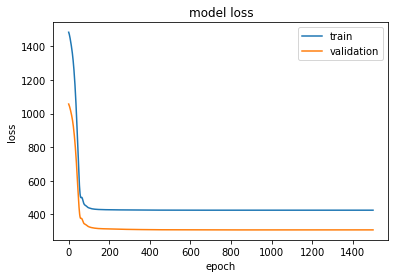

In [13]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [14]:
# evaluate model
if ieta in range (26,28):
    preds = model.predict([X_test[:,np.r_[0:12,12]],X_test[:,np.r_[0:12,13]], X_test[:,np.r_[0:12,14]], 
                           X_test[:,np.r_[0:12,15]], X_test[:,np.r_[0:12,16]], X_test[:,np.r_[0:12,17]], 
                           X_test[:,np.r_[0:12,18]] ] )

    targets = [X_test[:,19], X_test[:,20], X_test[:,21], X_test[:,22], X_test[:,23], X_test[:,24], 
               X_test[:,25]]
    
    uncorrected = [X_test[:,26], X_test[:,27], X_test[:,28], X_test[:,29], X_test[:,30], 
                   X_test[:,31], X_test[:,32]]

else:
    preds = model.predict([X_test[:,np.r_[0:12,12]],X_test[:,np.r_[0:12,13]], X_test[:,np.r_[0:12,14]], 
                           X_test[:,np.r_[0:12,15]], X_test[:,np.r_[0:12,16]], X_test[:,np.r_[0:12,17]] ] )

    targets = [X_test[:,19], X_test[:,20], X_test[:,21], X_test[:,22], X_test[:,23], X_test[:,24]]
    
    uncorrected = [X_test[:,26], X_test[:,27], X_test[:,28], X_test[:,29], X_test[:,30]]
    
preds = preds.reshape(preds.shape[1],preds.shape[0])

if ieta in range (26,28):
    n=7
else:
    n=6

for i in range (0,n):
    targets[i] = targets[i].reshape(targets[i].shape[0],1)
    uncorrected[i] = uncorrected[i].reshape(uncorrected[i].shape[0],1)
#print(preds[1])
#print(targets[1])
#print (uncorrected[1])

#print(len(targets[1]))
#print(len(uncorrected[1]))
#print(len(preds))
#print(targets[1])

/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


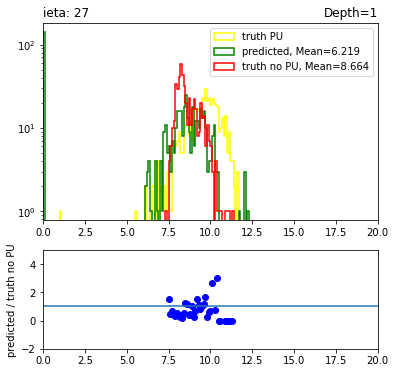

/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


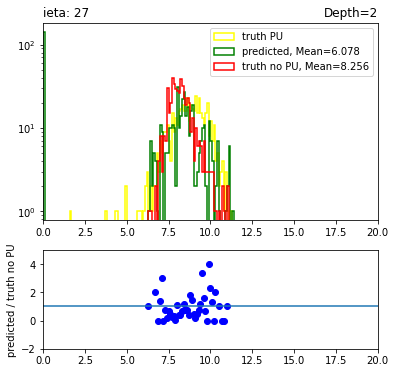

/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


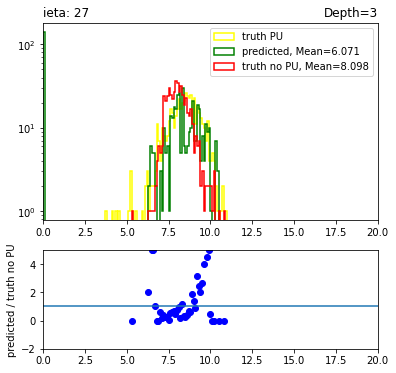

/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


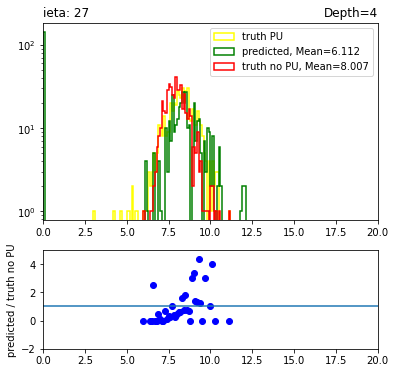

/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


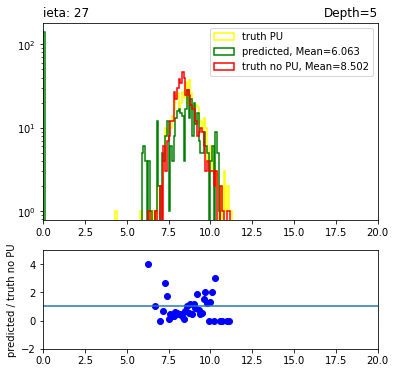

/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


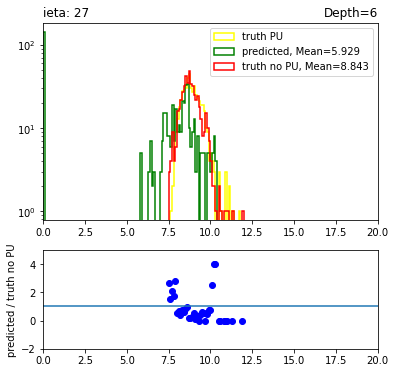

/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


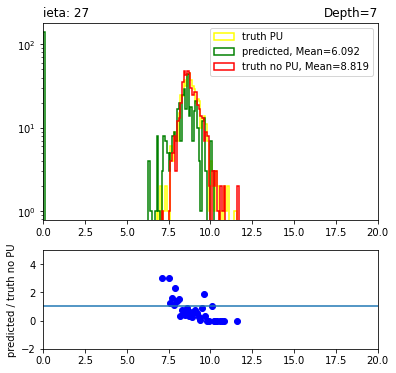

In [15]:
from matplotlib import gridspec
%matplotlib inline
i=0

if ieta in range (26,28):
    n=7
else:
    n=6

for j in range (0,n):
    fig = plt.figure(figsize=(6,6))
    gs = gridspec.GridSpec(2,1, height_ratios=[2, 1]) 
    ax = plt.subplot(gs[0])
    a=round(np.mean(targets[j][:,i]),3)
    b=round(np.mean(preds[j]),3)
    ns, bins, patches = ax.hist([targets[j][:,i], preds[j], uncorrected[j][:,i]], 
                            histtype='step', bins=200,  range=(0,20), linewidth=1.5,
                            label=['truth no PU, Mean='+str(a),'predicted, Mean='+str(b), 'truth PU'], 
                            color= ['red', 'green', 'yellow'], )
    ax.legend(loc='upper right')
    ax.set_yscale('log')    
    plt.xlim(0,20)
    k=j+1
    plt.title('ieta: '+str(ieta), loc='left')
    plt.title('Depth='+str(k), loc='right')
    
    ax1 = plt.subplot(gs[1])
    ax1.plot(bins[:-1], ns[1] / ns[0], 'bo')
    plt.ylabel('predicted / truth no PU')
    ax1.plot([-1, 21], [1, 1])
    plt.xlim(0,20)
    plt.ylim(-2,5)
    #plt.savefig('Log/ieta'+str(ieta)+'_'+str(k)+'_log.png')
    #plt.savefig('Log/ieta'+str(ieta)+'_'+str(k)+'_log.pdf')
    plt.show()


In [16]:
import statistics
b=(np.exp(preds[2])/10000)
print((np.exp(preds[0])/10000).mean())
print((np.exp(preds[1])/10000).mean())
print((np.exp(preds[2])/10000).mean())
print((np.exp(preds[3])/10000).mean())
print((np.exp(preds[4])/10000).mean())
print((np.exp(preds[5])/10000).mean())

0.77733684
0.62956357
0.51162237
0.69254076
0.533045
0.4463788


/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide


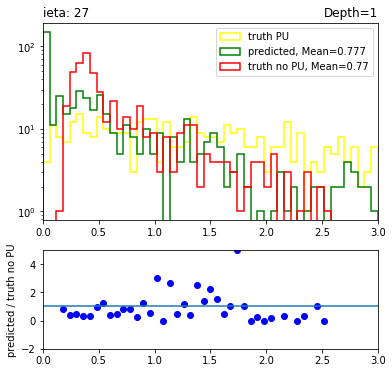

/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


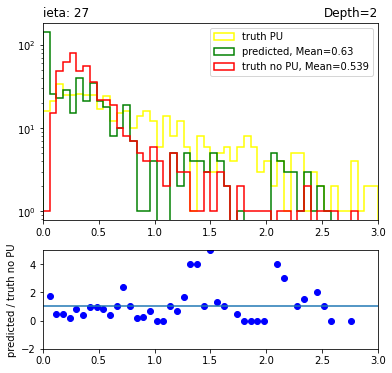

/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


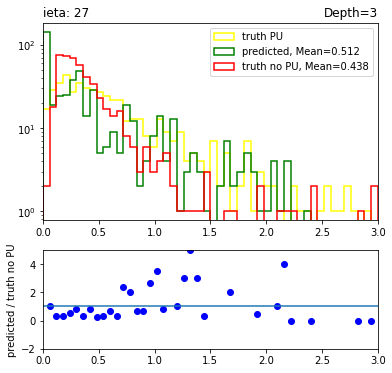

/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


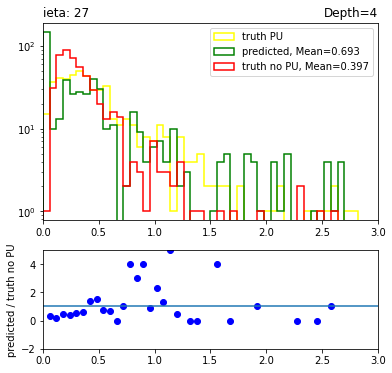

/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


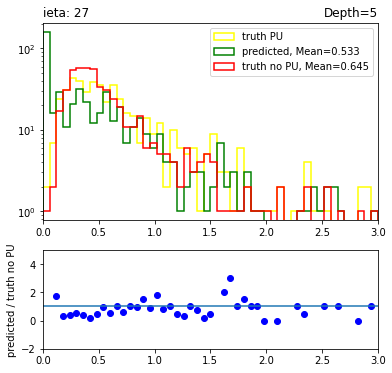

/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


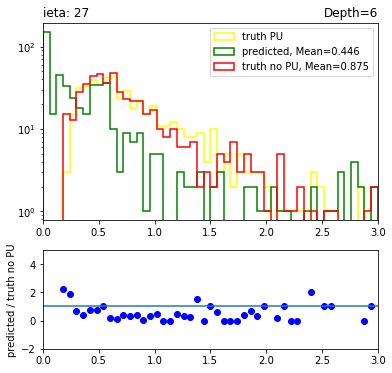

/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


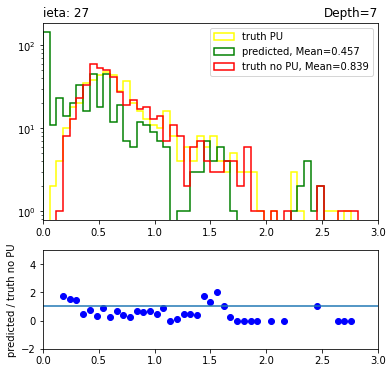

In [18]:
from matplotlib import gridspec
%matplotlib inline
i=0

if ieta in range (26,28):
    n=7
else:
    n=6

for j in range (0,n):
    fig = plt.figure(figsize=(6,6))
    gs = gridspec.GridSpec(2,1, height_ratios=[2, 1]) 
    ax = plt.subplot(gs[0])
    a=round(np.mean(np.exp((targets[j][:,i]))/10000),3)
    b=round(np.mean(np.exp(preds[j])/10000),3)
    ns, bins, patches = ax.hist([(np.exp((targets[j][:,i]))/10000), (np.exp(preds[j])/10000),
                                 (np.exp(uncorrected[j][:,i])/10000)], histtype='step', bins=50,  range=(0,3), 
                                linewidth=1.5, label=['truth no PU, Mean='+str(a),'predicted, Mean='+str(b), 
                                                      'truth PU'], color= ['red', 'green', 'yellow'], )
    ax.legend(loc='upper right')
    ax.set_yscale('log')   
    plt.xlim(0,3)
    k=j+1
    plt.title('ieta: '+str(ieta), loc='left')
    plt.title('Depth='+str(k), loc='right')
    
    ax1 = plt.subplot(gs[1])
    ax1.plot(bins[:-1], ns[1] / ns[0], 'bo')
    plt.ylabel('predicted / truth no PU')
    ax1.plot([-1, 3], [1, 1])
    plt.xlim(0,3)
    plt.ylim(-2,5)
    plt.savefig('nonLog/ieta'+str(ieta)+'_'+str(k)+'_nonLog.png')
    plt.savefig('nonLog/ieta'+str(ieta)+'_'+str(k)+'_nonLog.pdf')
    plt.show()
    



In [19]:
#save model
import os
if not os.path.exists('model'):
    os.makedirs('model')
model.save('model/model_ieta'+str(ieta)+'.h5')

In [20]:
import h5py
hf=h5py.File('model/model_ieta'+str(ieta)+'.h5','r')
hf.keys()

<KeysViewHDF5 ['model_weights', 'optimizer_weights']>